In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinvh,eig,eigh
from scipy.stats import linregress
%matplotlib inline

In [2]:
def Slope(a=1,p=1,nx=100,npt=20):
    print(a,p,nx)
    # power subdunction
    def power(M,r) :
        D,P = eigh(M)
        D   = np.diag(D**r)
        return P.dot(D).dot(np.transpose(P))
    # initialisation
    dx   = 1/nx
    # Matrice opérateur
    T   = dx*np.tri(nx)
    tTT = np.transpose(T).dot(T)
    # Matrice regularisation
#     B   = 2*nx**2*np.diag(np.ones(nx)) \
#           - nx**2*np.diag(np.ones(nx-1),1)\
#           - nx**2*np.diag(np.ones(nx-1),-1)
#     B[0,0]= nx**2
    D   = power(tTT,-p/2)
    tDD = np.transpose(D).dot(D)
    q   = 2*p+a
    R   = power(tTT,-q/2)
    # Synthetic Data
    t  = np.linspace(0,1-1/nx,nx)
    x  = np.exp(-(t-0.5)**2/0.1**2)
    # x  = x/np.linalg.norm(x)
    rho= np.linalg.norm(R.dot(x))
    y  = T.dot(x)
    # eps
    eps   = np.logspace(-3,-1,npt)
    delta = np.zeros(npt)
    err   = np.zeros(npt)
    # initialise error vector 
    no = np.random.randn(nx)
    no = no*np.linalg.norm(y)/np.linalg.norm(no)
    for i,l in enumerate(eps):
        # step0 : initialisation
        error_compare = 1000
        # step1 : noisy data
        yd = y + l*no
        delta[i] = np.linalg.norm(yd-y)
        # step 2 : optimal alpha
        alpha_op = (delta[i]/rho)**(2*(a+p)/(a+q))
        for alpha in np.linspace(alpha_op/20,alpha_op*10,1000*npt):
            # step 3 : inversion
            xd    = np.linalg.inv(tTT + alpha*tDD).dot(np.transpose(T).dot(yd))
            # step 4 : error
            error = np.linalg.norm(xd-x)
            if error < error_compare:
                error_compare = error
                err[i]        = error
                reg           = alpha
        print(reg,alpha_op)
    # plot
    s,r,R,_,_ = linregress(np.log(delta), np.log(err))
    plt.loglog(delta,err,'r+',label='error')
    plt.loglog(delta,np.exp(r)*delta**s,label="%.3f"%s)
    plt.legend()
    plt.show()
    # stat
    q = 2*p+a
    print("th. smax =", q/(a+q),", s = %.2f"%(s), ", R = %.5f"%(R))
    print("th. qmax = ",q ,", q = %.2f"%(s*a/(1-s)))
    return s

In [3]:
np.random.seed(101)

1 1 20
3.082524690669004e-08 1.0821819209662191e-07
6.525144383686331e-08 1.8051882437119117e-07
1.325181522190543e-07 3.0112354790830825e-07
2.5304354103661133e-07 5.023043520294366e-07
4.512846490995453e-07 8.378941594582303e-07
7.694782734721362e-07 1.397691697509063e-06
1.2766069268629035e-06 2.3314902714549304e-06
2.094677788041308e-06 3.889160174290682e-06
3.494133143492739e-06 6.487510175991365e-06
6.205472918439722e-06 1.0821819209662046e-05


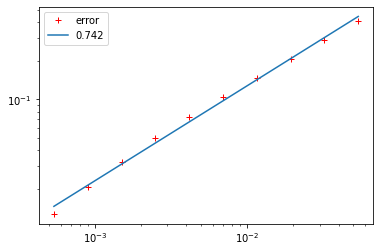

th. smax = 0.75 , s = 0.74 , R = 0.99769
th. qmax =  3 , q = 2.87
1 1 30
7.52110430191067e-08 9.649766070189112e-08
1.2305689658522653e-07 1.6096779965537642e-07
1.969882414545414e-07 2.6851047307704335e-07
3.138878431395527e-07 4.47902464383658e-07
5.035223858891707e-07 7.471463414516098e-07
8.225630551786116e-07 1.2463152135424872e-06
1.3700490831634112e-06 2.0789790772308264e-06
2.3129872234563467e-06 3.467946115556423e-06
3.915860570162912e-06 5.7848827783405296e-06
6.599266463102393e-06 9.64976607018921e-06


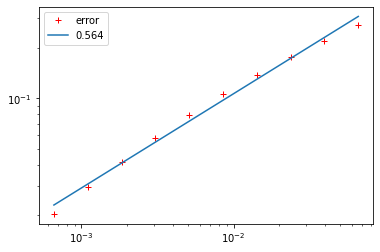

th. smax = 0.75 , s = 0.56 , R = 0.99585
th. qmax =  3 , q = 1.29
1 1 40
6.84728595518441e-08 9.258043928696456e-08
9.977400580926684e-08 1.5443348050880172e-07
1.4336173885110904e-07 2.5761057179840764e-07
2.0493263415238072e-07 4.297203332053381e-07
2.933435674675281e-07 7.168167186656111e-07
4.2269424970957865e-07 1.1957223534800908e-06
6.217344574705536e-07 1.994585100182259e-06
9.411005345907532e-07 3.3271684771052565e-06
1.503576064689105e-06 5.550051524014383e-06
2.5818174410414513e-06 9.258043928696398e-06


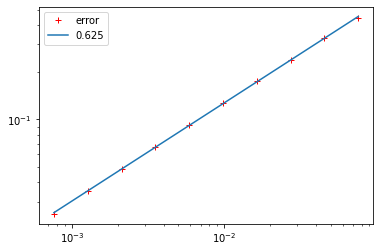

th. smax = 0.75 , s = 0.62 , R = 0.99992
th. qmax =  3 , q = 1.66
1 1 50
6.00179413833905e-08 9.079992372697683e-08
8.655105616435865e-08 1.514634015466939e-07
1.2501667401950806e-07 2.526561814861875e-07
1.8169938451101006e-07 4.2145591206402284e-07
2.6601480211271916e-07 7.030308333201388e-07
3.947263088274591e-07 1.1727261107295284e-06
5.922574556101825e-07 1.9562250552964623e-06
9.100124466436562e-07 3.263180065624242e-06
1.4529926008398433e-06 5.443312420448322e-06
2.4689152178108043e-06 9.0799923726976e-06


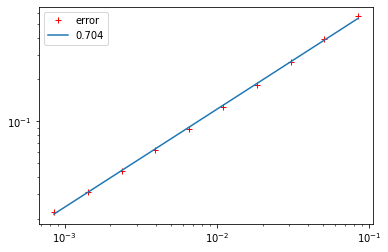

th. smax = 0.75 , s = 0.70 , R = 0.99979
th. qmax =  3 , q = 2.38
1 1 60
6.3049803222452e-08 8.984138722300884e-08
9.473430663826781e-08 1.4986446628949958e-07
1.4459309567533913e-07 2.4998899672471487e-07
2.237673644008935e-07 4.170067797306e-07
3.490394465144076e-07 6.956092332846802e-07
5.441291124906403e-07 1.1603461357234986e-06
8.518054910684249e-07 1.9355740123383777e-06
1.3373615455484247e-06 3.2287320497721194e-06
2.134383298007978e-06 5.385849666699921e-06
3.4977851417186884e-06 8.984138722300898e-06


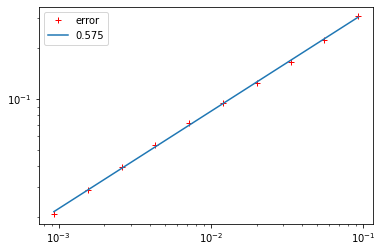

th. smax = 0.75 , s = 0.58 , R = 0.99975
th. qmax =  3 , q = 1.35
1 1 70
5.2164447329097655e-08 8.92663669702123e-08
7.723595526433123e-08 1.489052746969088e-07
1.1598440793328348e-07 2.4838896871383625e-07
1.7698136061966887e-07 4.143377721461177e-07
2.759651412679849e-07 6.911570602992139e-07
4.373922085332926e-07 1.1529194635747332e-06
6.951664795758754e-07 1.9231855765374147e-06
1.102145353741531e-06 3.2080668933574664e-06
1.7266610282554677e-06 5.351378108183316e-06
2.6848205691355914e-06 8.926636697021224e-06


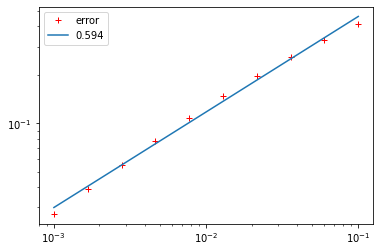

th. smax = 0.75 , s = 0.59 , R = 0.99724
th. qmax =  3 , q = 1.46
1 1 80
4.725873654376653e-08 8.889434354533632e-08
7.071663191776268e-08 1.482847022220214e-07
1.0787064458869412e-07 2.4735379143510626e-07
1.6721082130093314e-07 4.1261099237137057e-07
2.6111696397964495e-07 6.882766180293325e-07
4.070071410834248e-07 1.148114596276971e-06
6.331899834741731e-07 1.915170574816842e-06
9.894646804293248e-07 3.1946970646817197e-06
1.5497703096426851e-06 5.329075889787028e-06
2.43479286596272e-06 8.889434354533624e-06


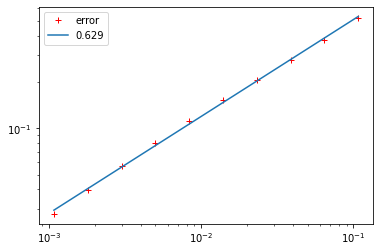

th. smax = 0.75 , s = 0.63 , R = 0.99940
th. qmax =  3 , q = 1.70
1 1 90
5.497371231966493e-08 8.863982543730018e-08
8.478630804803792e-08 1.4786014042927824e-07
1.2940567812402874e-07 2.466455796805557e-07
1.9498159691899224e-07 4.114296239631548e-07
2.9110176950753115e-07 6.86305976752957e-07
4.30904594733255e-07 1.144827368505219e-06
6.370780498984072e-07 1.9096871484048844e-06
9.422525400249676e-07 3.185550158138237e-06
1.4184264172665598e-06 5.3138179300681255e-06
2.180846430226026e-06 8.863982543729945e-06


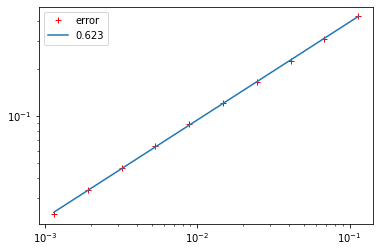

th. smax = 0.75 , s = 0.62 , R = 0.99990
th. qmax =  3 , q = 1.65
1 1 100
4.48261712889076e-08 8.84580396127466e-08
6.405569284260102e-08 1.475569033976864e-07
9.142052234233856e-08 2.4613974982525805e-07
1.3043563847004527e-07 4.105858489098009e-07
1.8622882030123994e-07 6.848984751331831e-07
2.697206862136095e-07 1.1424795142971621e-06
3.987175715736916e-07 1.9057706915391582e-06
6.144859813715429e-07 3.179017114336597e-06
9.986397293840916e-07 5.3029201561930595e-06
1.7274486553638332e-06 8.845803961274662e-06


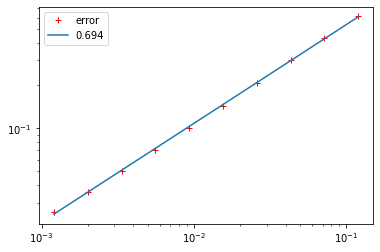

th. smax = 0.75 , s = 0.69 , R = 0.99988
th. qmax =  3 , q = 2.27
1 1 110
3.350805684306112e-08 8.832368333784156e-08
4.9297322485192143e-08 1.4733278362334263e-07
7.293955227708348e-08 2.4576589550927787e-07
1.0902395693399545e-07 4.099622223244784e-07
1.6689176794391137e-07 6.838582032911932e-07
2.7271647760900404e-07 1.1407442362787055e-06
4.984701769087843e-07 1.9028760733443796e-06
9.799541453442896e-07 3.1741886001708976e-06
1.81907417581427e-06 5.294865709119377e-06
3.131078549289748e-06 8.832368333784207e-06


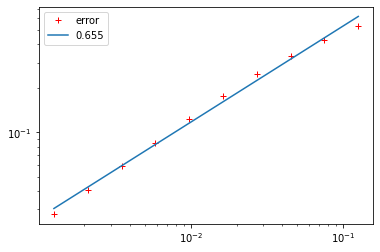

th. smax = 0.75 , s = 0.66 , R = 0.99673
th. qmax =  3 , q = 1.90
1 1 120
4.049245968501284e-08 8.82215767617648e-08
5.890545755933392e-08 1.4716245958893648e-07
8.629056435131648e-08 2.454817778959865e-07
1.2764207305722893e-07 4.0948828558111915e-07
1.898093216928853e-07 6.830676291549973e-07
2.826057794040205e-07 1.1394254791374197e-06
4.2413080222018306e-07 1.900676253848565e-06
6.475481613517447e-07 3.1705190800881873e-06
1.0328099915491776e-06 5.288744580698142e-06
1.7930622999709608e-06 8.822157676176474e-06


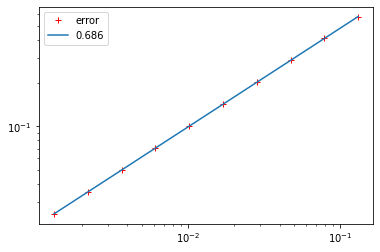

th. smax = 0.75 , s = 0.69 , R = 1.00000
th. qmax =  3 , q = 2.19
1 1 130
3.414087385393545e-08 8.814216309462964e-08
5.065910278012208e-08 1.4702998960812757e-07
7.547429702045672e-08 2.452608046498364e-07
1.1287104202638463e-07 4.0911967999050964e-07
1.7198164411801648e-07 6.82452757971286e-07
2.7102317760853413e-07 1.138399812185563e-06
4.5209390816246257e-07 1.898965338255183e-06
8.108766468828007e-07 3.167665100867762e-06
1.5208826421440185e-06 5.283983856427395e-06
2.7650317329625476e-06 8.814216309462976e-06


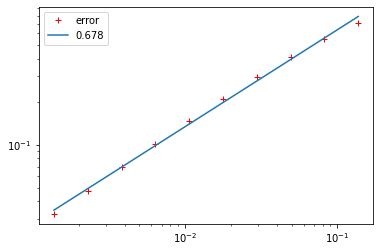

th. smax = 0.75 , s = 0.68 , R = 0.99864
th. qmax =  3 , q = 2.11
1 1 140
4.1654167953764625e-08 8.807918145995568e-08
6.34889379844428e-08 1.469249299094934e-07
9.785774255687073e-08 2.450855545101068e-07
1.506250123134493e-07 4.088273451382835e-07
2.308989694320676e-07 6.819651140472445e-07
3.5233435731918436e-07 1.1375863730939081e-06
5.348564723119943e-07 1.8976084400694147e-06
8.197469070927693e-07 3.165401658275155e-06
1.2886052671067926e-06 5.280208206622745e-06
2.096934608115055e-06 8.807918145995561e-06


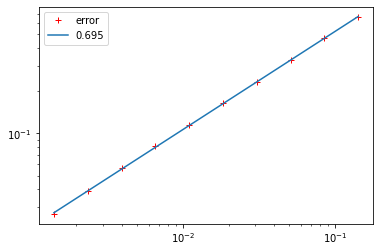

th. smax = 0.75 , s = 0.70 , R = 0.99995
th. qmax =  3 , q = 2.28
1 1 150
3.313323837189995e-08 8.80283908758028e-08
4.810966248748573e-08 1.46840206108782e-07
7.025825476205508e-08 2.44944226692627e-07
1.0296720711355486e-07 4.085915961300242e-07
1.534473942284206e-07 6.815718609999234e-07
2.3333850331589407e-07 1.1369303874744169e-06
3.684726589776242e-07 1.8965141901051447e-06
6.083532938542053e-07 3.163576339321926e-06
1.0410509698076815e-06 5.277163391096301e-06
1.8066552888866644e-06 8.802839087580223e-06


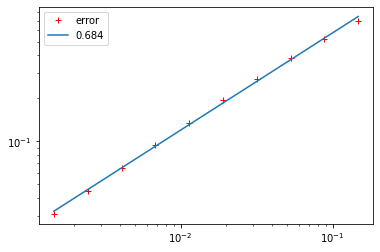

th. smax = 0.75 , s = 0.68 , R = 0.99923
th. qmax =  3 , q = 2.16
1 1 160
3.600693397390255e-08 8.798683565215466e-08
5.3782965447459876e-08 1.467708878178931e-07
8.070112733677763e-08 2.4482859681435705e-07
1.2161287834202092e-07 4.083987138679654e-07
1.8388098136423787e-07 6.812501139949663e-07
2.784613439146463e-07 1.1363936811226043e-06
4.173432811648105e-07 1.8956189099513673e-06
6.269456338531495e-07 3.1620829220164653e-06
9.355830500403825e-07 5.2746722208868e-06
1.4030464056963547e-06 8.7986835652155e-06


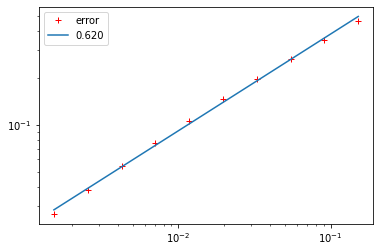

th. smax = 0.75 , s = 0.62 , R = 0.99906
th. qmax =  3 , q = 1.63
1 1 170
2.732822566702021e-08 8.795240466856624e-08
3.9016476061322204e-08 1.4671345347567247e-07
5.6316199399256345e-08 2.4473279055724466e-07
8.216017093765324e-08 4.0823889939900846e-07
1.234984977896698e-07 6.809835273934476e-07
1.924433231324503e-07 1.1359489878694003e-06
3.247859932786876e-07 1.8948771168968097e-06
6.235549418208831e-07 3.160845536623665e-06
1.375945598957167e-06 5.272608137648346e-06
3.0566517274054126e-06 8.79524046685661e-06


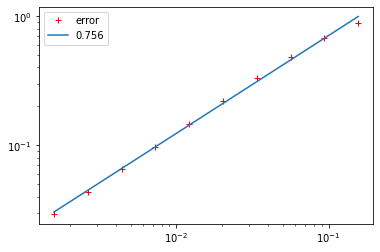

th. smax = 0.75 , s = 0.76 , R = 0.99888
th. qmax =  3 , q = 3.09
1 1 180
3.0643984545083444e-08 8.792355743017529e-08
4.294423740460148e-08 1.4666533338181544e-07
6.019298608891938e-08 2.446525214028312e-07
8.416374891554989e-08 4.08105002379411e-07
1.1736117486043122e-07 6.807601737031278e-07
1.663899390367022e-07 1.1355764114585934e-06
2.3797071702744822e-07 1.8942556219857937e-06
3.529385419861186e-07 3.1598088206287327e-06
5.467765802690519e-07 5.270878791140275e-06
9.120783072752168e-07 8.792355743017492e-06


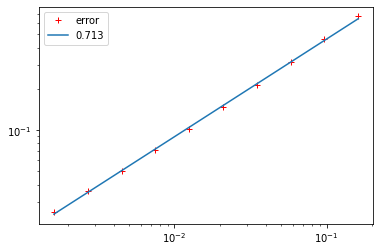

th. smax = 0.75 , s = 0.71 , R = 0.99972
th. qmax =  3 , q = 2.48
1 1 190
3.2822187284349143e-08 8.789914847368751e-08
4.818493444702445e-08 1.4662461678838615e-07
7.112864636635463e-08 2.445846020314596e-07
1.0525198577147615e-07 4.079917060395387e-07
1.5593104850739114e-07 6.805711840177237e-07
2.3186622023993052e-07 1.1352611576628467e-06
3.4720272613401054e-07 1.8937297469597553e-06
5.257303819613038e-07 3.158931608215298e-06
8.140480190397421e-07 5.269415512642184e-06
1.3404202579525826e-06 8.789914847368752e-06


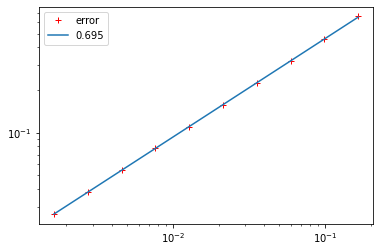

th. smax = 0.75 , s = 0.69 , R = 0.99999
th. qmax =  3 , q = 2.27


In [4]:
slope =[]
for nxi in np.arange(20,200,10):
    slope.append(Slope(nx=nxi,npt=10))

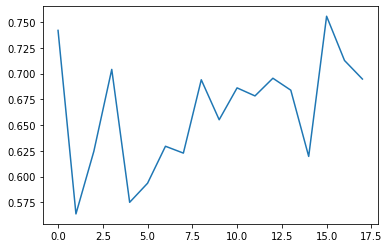

In [5]:
plt.plot(slope)